In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
a = 1
N = 10000
m = 1

# P(r) = 3*r^3/(a^3)
# r(P) = a(P/3)^(1/3)

cdf_r = np.random.uniform(0,1,N)
r = a*(cdf_r/3)**(1/3)

# P(theta) = (1 - cos(theta))/2
# theta(P) = cos^(-1)(1 - 2P)

cdf_theta = np.random.uniform(0,1,N)
theta = np.arccos(1 - 2*cdf_theta)

phi = np.random.uniform(0,2*np.pi,N)

In [3]:
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta) 

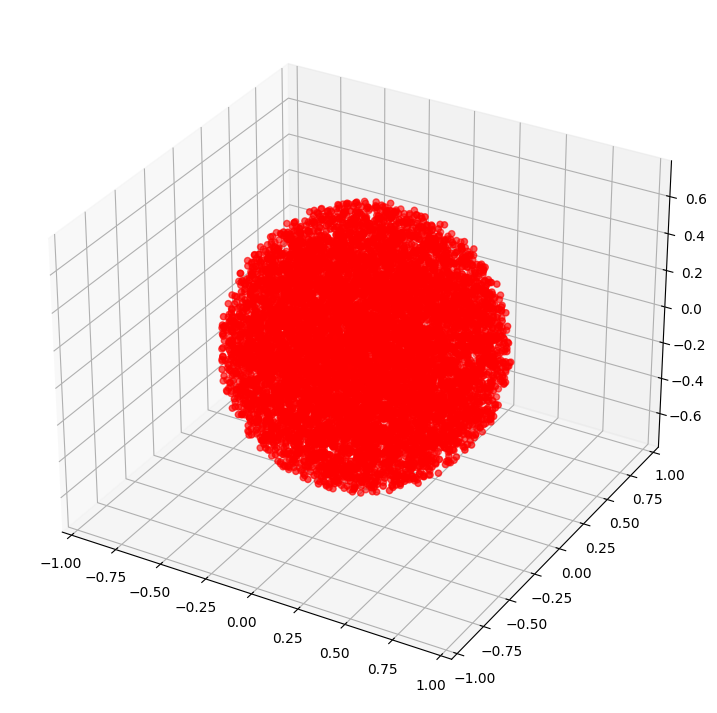

In [4]:
# Generating 3D plot

fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c = 'r', label = 'Mass 1 orbit')
plt.axis('equal')
plt.show()

In [5]:
Vsphere = 4*np.pi/3*a**3
test_frac = 1000
Vtest = Vsphere/ test_frac

def Volume_test(Vtest, r, theta, phi):
    # Uniform generation of the coordinates, otherwise it is a tautology
    r_test = np.random.uniform(0,a, 2)
    theta_test = np.random.uniform(0,np.pi, 2)
    phi1 = np.random.uniform(0,2*np.pi)
    
    # Sorting 
    r1 = r_test.min()
    r2 = r_test.max()
    theta1 = theta_test.min()
    theta2 = theta_test.max()
    
    ftheta = 0.5*(- theta1 + np.sin(theta1)*np.cos(theta1) + theta2 - np.sin(theta2)*np.cos(theta2))
    
    phi2 = phi1 + 3*Vtest/(ftheta * (r2-r1)**3)
    
    return phi2

print(Volume_test(Vtest, r, theta, phi))

4.368316246387373


# Creating initial conditions file

In [6]:
# open the file
file = open('homogeneous_sphere_initial.txt', 'w')

# write to the file
file.write(f'{N}\n')
file.write('0\n')
for i in range(N):
    file.write(f'{m} {x[i]} {y[i]} {z[i]} {0} {0} {0}\n')

# close the file
file.close()